In [1]:
import talib
import numpy as np
import pandas as pd
from backtesting_mom.signals1 import params_long, compute_signals_long
from backtesting.utils_compact import compact_all_medians, compact_best_medians
import warnings
warnings.simplefilter('ignore')

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


In [2]:
interval = '1h'
direction = 'long'
symbols = [
    "BTCUSDT",
    "ETHUSDT",
    "SOLUSDT",
    "BNBUSDT",
]

In [3]:
params = params_long()
print(params.keys())

Number of permutations params_long: 18
dict_keys(['adx_p', 'adx_low', 'adx_high'])


In [4]:
medians_df, ohlc_dict, count_bars = compact_all_medians(
    symbols,
    interval,
    params,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing signals for BTCUSDT
Start computing signals for BNBUSDT
Start computing signals for ETHUSDT
Start computing signals for SOLUSDT
End computing signals for ETHUSDT
End computing signals for BTCUSDT
End computing signals for BNBUSDT
End computing signals for SOLUSDT


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing portfolio metrics for SOLUSDT
Start computing portfolio metrics for BTCUSDT
Start computing portfolio metrics for ETHUSDT
Start computing portfolio metrics for BNBUSDT
End computing portfolio metrics for BNBUSDT
End computing portfolio metrics for SOLUSDT
End computing portfolio metrics for ETHUSDT
End computing portfolio metrics for BTCUSDT


In [5]:
print(count_bars)

8784


In [6]:
joined_long_df = medians_df.copy()
joined_long_df = joined_long_df.replace([np.inf, -np.inf], np.nan)
joined_long_df = joined_long_df.dropna()
# remove with negative total return
# joined_long_df = joined_long_df[joined_long_df['total_return'] > 0]
# joined_long_df = joined_long_df[joined_long_df > joined_long_df.quantile(0.45)]
joined_long_df = joined_long_df.dropna()
print(joined_long_df.describe())
# joined_long_df.sort_values(by='win_rate', ascending=False)
# joined_long_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_long_df = joined_long_df.sort_values(by='expectancy', ascending=False).head(55)
joined_long_df.head(10)

       total_return   win_rate      count  profit_factor  max_drawdown  \
count     18.000000  18.000000  18.000000      18.000000     18.000000   
mean      -0.122876   0.491658  60.555556       0.648889     -0.148678   
std        0.032450   0.024761   5.695429       0.061847      0.030511   
min       -0.155135   0.466667  39.000000       0.592738     -0.180382   
25%       -0.155135   0.466667  60.500000       0.592738     -0.180382   
50%       -0.133293   0.487705  62.500000       0.629313     -0.156098   
75%       -0.084133   0.519321  63.500000       0.721006     -0.112062   
max       -0.065424   0.527444  63.500000       0.741152     -0.099358   

       expectancy  
count   18.000000  
mean    -2.067256  
std      0.429615  
min     -2.489719  
25%     -2.489719  
50%     -2.145639  
75%     -1.590823  
max     -1.435721  


total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
14         24           29                -0.083237  0.527444   60.5   
                        30                -0.083237  0.527444   60.5   
                        28                -0.083237  0.527444   60.5   
                        26                -0.081289  0.524943   58.0   
                        27                -0.086824  0.522727   60.5   
                        25                -0.065424  0.509104   39.0   
           23           26                -0.133293  0.487705   62.5   
                        27                -0.133293  0.487705   62.5   
                        28                -0.133293  0.487705   62.5   
                        29                -0.133293  0.487705   62.5   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
14         24           29                  0.741152     -0.110354   -1.435721  
                        30                  0.741152     -0.110354   -1.435721  
                        28                  0.741152     -0.110354   -1.435721  
                        26                  0.732432     -0.111474   -1.486394  
                        27                  0.728861     -0.113824   -1.521753  
                        25                  0.697439     -0.099358   -1.798034  
           23           26                  0.629313     -0.156098   -2.145639  
                        27                  0.629313     -0.156098   -2.145639  
                        28                  0.629313     -0.156098   -2.145639  
                        29                  0.629313     -0.156098   -2.145639

In [7]:
dfc = joined_long_df.copy()
joined_best_orig_df, pf_dict = compact_best_medians(
    dfc,
    symbols,
    ohlc_dict,
    compute_signals_long,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing signals for BNBUSDT
Start computing signals for BTCUSDT
Start computing signals for ETHUSDT
Start computing signals for SOLUSDT
End computing signals for BTCUSDT
End computing signals for ETHUSDT
End computing signals for BNBUSDT
End computing signals for SOLUSDT
Start computing portfolio for BTCUSDT
End computing portfolio for BTCUSDT
Start computing portfolio for ETHUSDT
End computing portfolio for ETHUSDT
Start computing portfolio for SOLUSDT
End computing portfolio for SOLUSDT
Start computing portfolio for BNBUSDT
End computing portfolio for BNBUSDT


In [8]:
joined_best_df = joined_best_orig_df.copy()
# joined_df.sort_values(by='expectancy', ascending=False)
joined_best_df
joined_best_df = joined_best_df.replace([np.inf, -np.inf], np.nan)
joined_best_df = joined_best_df.dropna()
# joined_df = joined_df[joined_df > joined_df.quantile(0.35)]
joined_best_df = joined_best_df.dropna()
# # print(joined_df.describe())

# # drop multiindex and save to csv
# # joined_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_best_df = joined_best_df.sort_values(by='expectancy', ascending=False).head(5)
joined_best_df.head(4)

total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
14         24           29                -0.083237  0.527444   60.5   
                        30                -0.083237  0.527444   60.5   
                        28                -0.083237  0.527444   60.5   
                        26                -0.081289  0.524943   58.0   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
14         24           29                  0.741152     -0.110354   -1.435721  
                        30                  0.741152     -0.110354   -1.435721  
                        28                  0.741152     -0.110354   -1.435721  
                        26                  0.732432     -0.111474   -1.486394

#########################
BTCUSDT


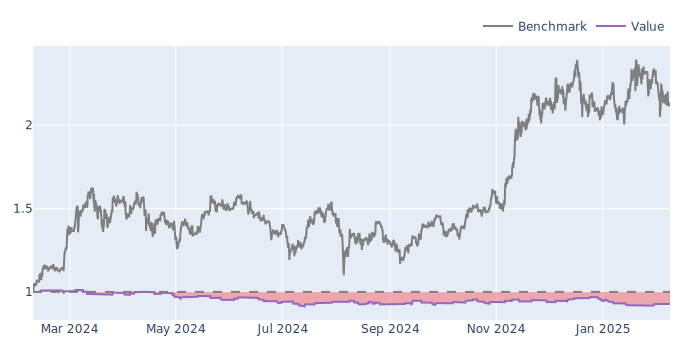

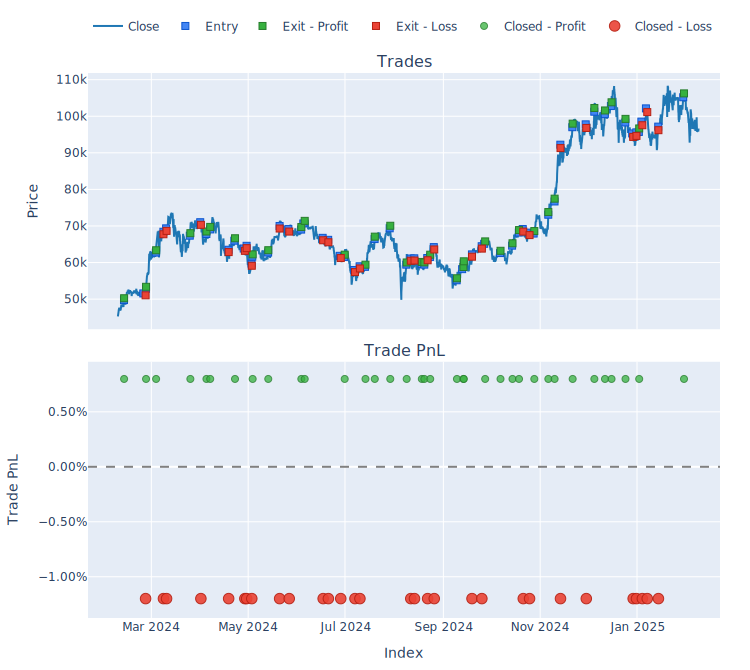

#########################
#########################
ETHUSDT


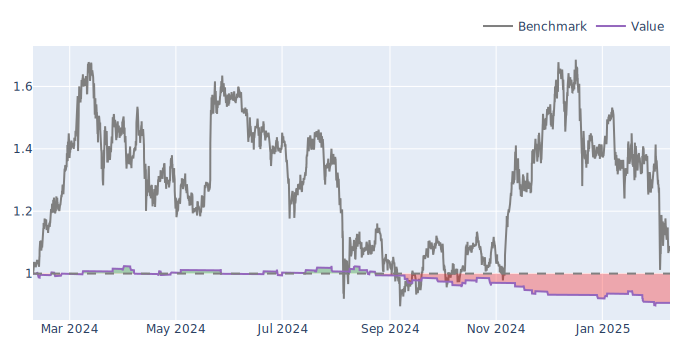

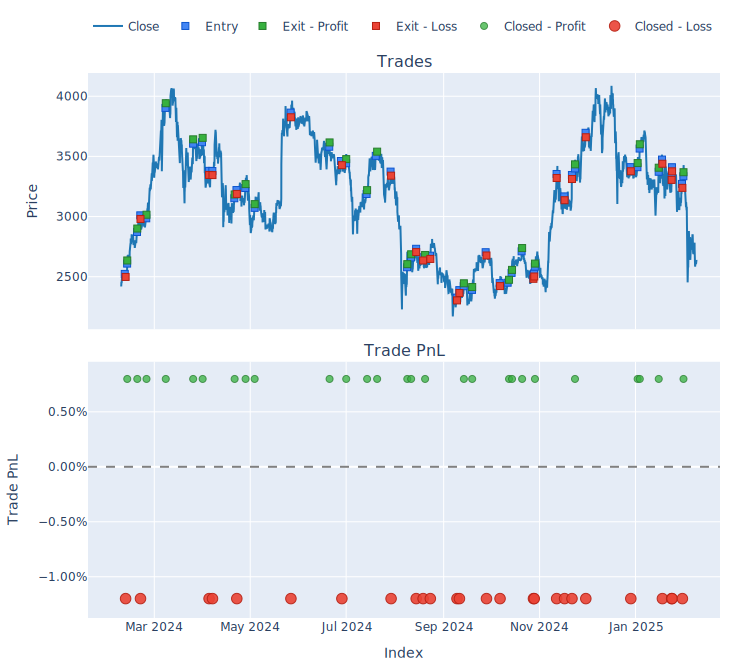

#########################
#########################
SOLUSDT


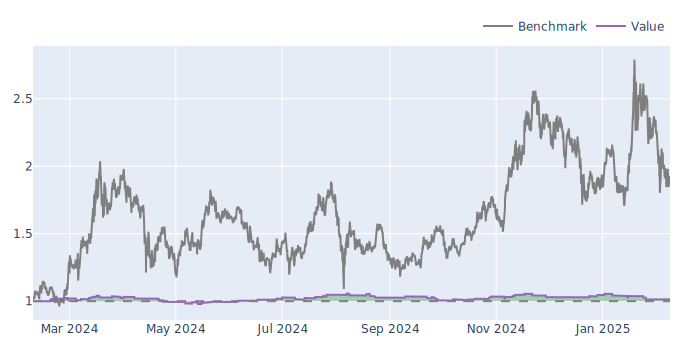

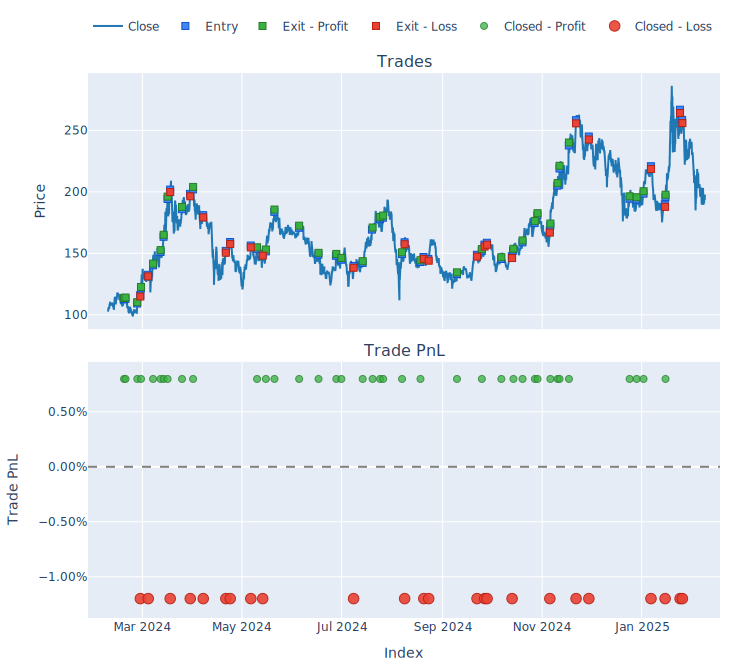

#########################
#########################
BNBUSDT


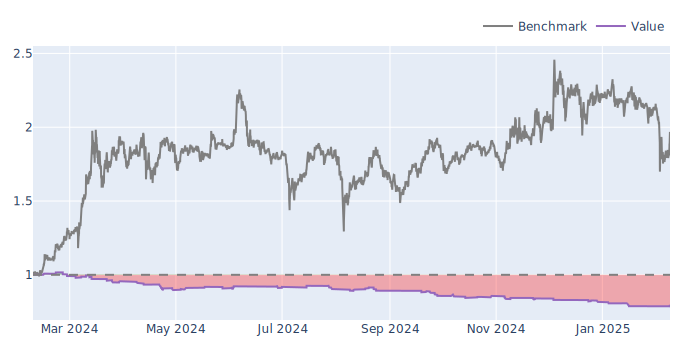

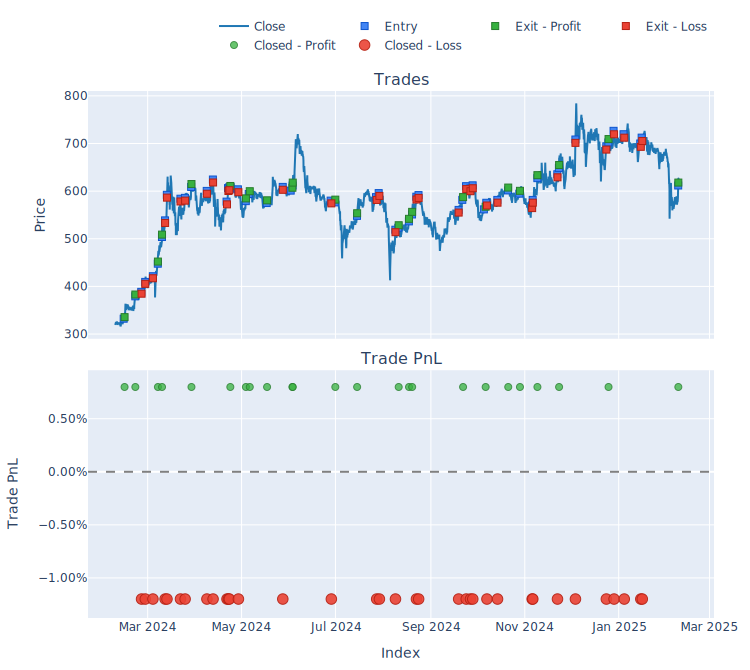

#########################


In [9]:
idxs = [0]
for idx in idxs:
   for symbol in symbols:
      pf = pf_dict[symbol].copy()
      print("#########################")
      print(symbol)
      pf[joined_best_df.index[idx]].plot_cum_returns().show_svg()
      pf.trades[joined_best_df.index[idx]].plots(settings=dict(plot_zones=False)).show_svg()
      print("#########################")